# Amazon Forest Fires Analysis

1. Display Top 5 Rows of The Dataset
2. Check Last 5 Rows
3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
5. Check For Duplicate Data and Drop Them
6. Check Null Values In The Dataset
7. Get Overall Statistics About The Dataframe
8. Rename Month Names To English
9. Total Number of Fires Registered
10. In Which Month Maximum Number of Forest Fires Were Reported?
11. In Which Year Maximum Number of Forest Fires Was Reported?
12. In Which State Maximum Number of Forest Fires Was Reported?
13. Find Total Number of Fires Were Reported In Amazonas
14. Display Number of Fires Were Reported In Amazonas (Year-Wise)
15. Display Number of Fires Were Reported In Amazonas (Day-Wise)
16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’
17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)
18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amazon.csv", encoding = "ISO-8859-1", parse_dates=["date"])

## 1. Display Top 5 Rows of The Dataset

In [3]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## 2. Check Last 5 Rows

In [4]:
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


## 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
df.shape

(6454, 5)

In [6]:
print(f"Number of rows = {df.shape[0]}")
print(f"Number of columns = {df.shape[1]}")

Number of rows = 6454
Number of columns = 5


## 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## 5. Check For Duplicate Data and Drop Them

In [8]:
print(f"Any duplicated? {df.duplicated().any()}")

Any duplicated? True


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(6422, 5)

## 6. Check Null Values In The Dataset

In [11]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [12]:
print(f"Any null values? {df.isnull().any()}")

Any null values? year      False
state     False
month     False
number    False
date      False
dtype: bool


## 7. Get Overall Statistics About The Dataframe

In [13]:
df.describe(include="all", datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


## 8. Rename Month Names To English

In [14]:
df.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [15]:
df['month'] = df['month'].replace({'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March', 'Abril': 'April', 
                             'Maio': 'May', 'Junho': 'June', 'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September', 
                             'Outubro': 'October', 'Novembro': 'November', 'Dezembro': 'December'})

In [16]:
df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

## 9. Total Number of Fires Registered

In [17]:
len(df.number)

6422

## 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [18]:
df_month = df.groupby("month")["number"].sum().reset_index()

df_month

,month,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,November,85508.054


<AxesSubplot:xlabel='month', ylabel='number'>

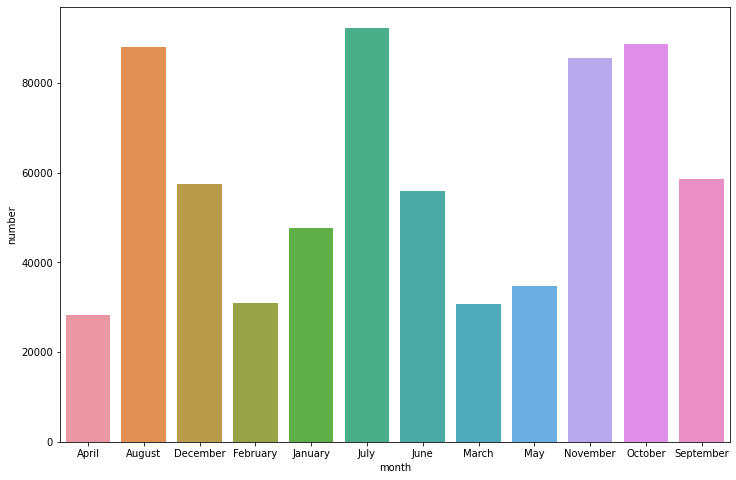

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_month, x="month", y="number")

## 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [20]:
df_year = df.groupby("year")["number"].sum().reset_index()

df_year

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot:xlabel='year', ylabel='number'>

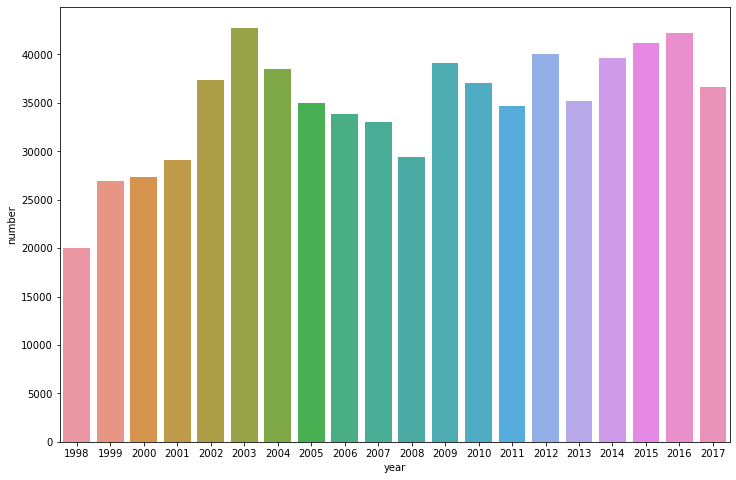

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_year, x="year", y="number")

## 12. In Which State Maximum Number of Forest Fires Was Reported?

In [22]:
df_state = df.groupby("state")["number"].sum().reset_index()

df_state

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


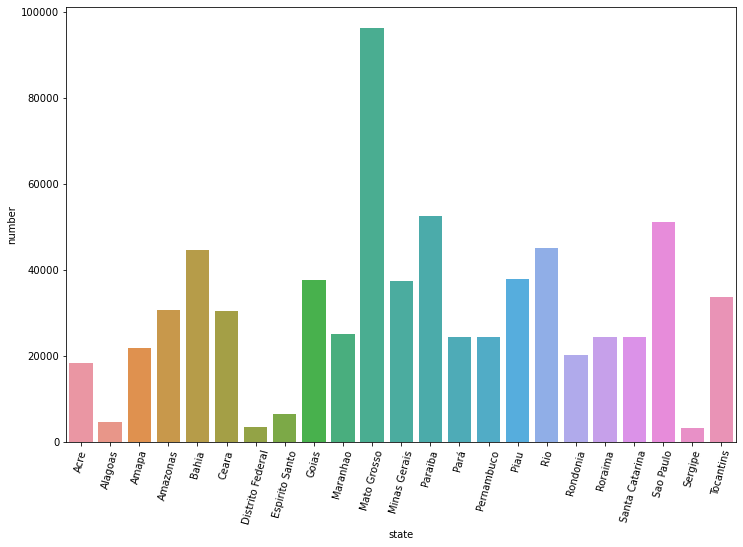

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_state, x="state", y="number")
plt.xticks(rotation=75)
plt.show()

## 13. Find Total Number of Fires Were Reported In Amazonas

In [24]:
df[df["state"]=="Amazonas"]["number"].sum()

30650.129

## 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [25]:
df_amazon_year = df[df["state"]=="Amazonas"]
df_amazon_year = df_amazon_year.groupby("year")["number"].sum().reset_index()
df_amazon_year

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


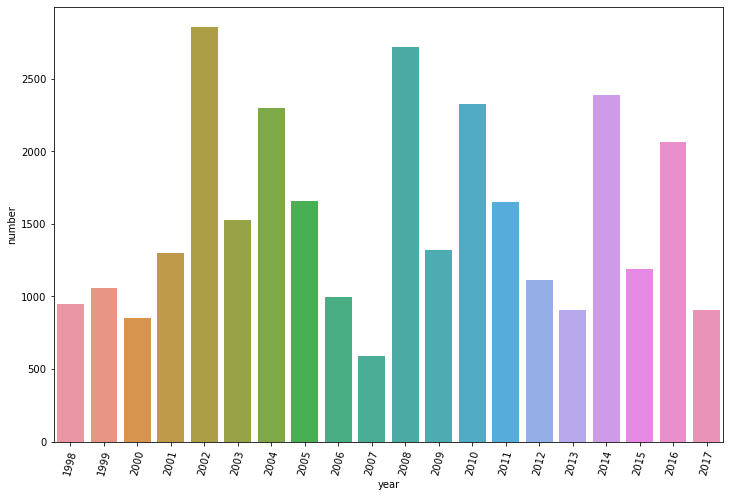

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_amazon_year, x="year", y="number")
plt.xticks(rotation=75)
plt.show()

## 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [27]:
df_amazonas = df[df["state"]=="Amazonas"]
df_amazonas

,year,state,month,number,date
718,1998,Amazonas,January,0.0,1998-01-01
719,1999,Amazonas,January,3.0,1999-01-01
720,2000,Amazonas,January,7.0,2000-01-01
721,2001,Amazonas,January,3.0,2001-01-01
722,2002,Amazonas,January,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,December,80.0,2012-01-01
953,2013,Amazonas,December,236.0,2013-01-01
954,2014,Amazonas,December,293.0,2014-01-01
955,2015,Amazonas,December,565.0,2015-01-01


In [28]:
day = df_amazonas.groupby(df_amazonas["date"].dt.dayofweek).sum()["number"]

import calendar

day.index = [calendar.day_name[x] for x in range(0, 7)]
day = day.reset_index()
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


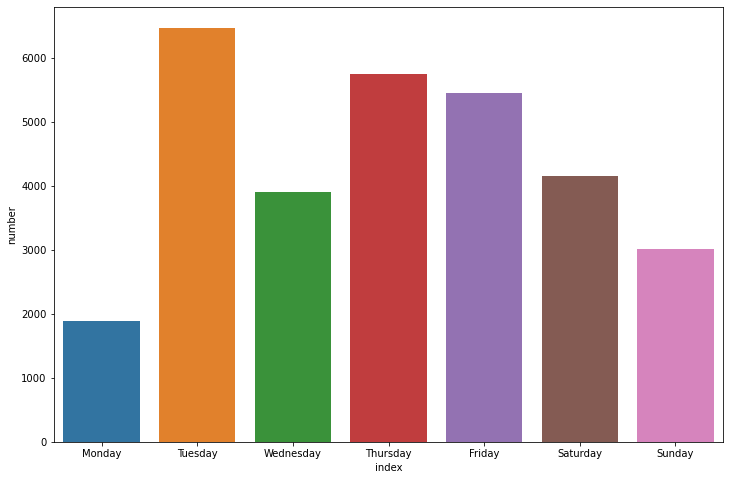

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(data=day, x="index", y="number")
plt.show()

## 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [30]:
df_2015 = df[df["year"]==2015]
df_2015

,year,state,month,number,date
17,2015,Acre,January,1.000,2015-01-01
37,2015,Acre,February,2.000,2015-01-01
57,2015,Acre,March,2.000,2015-01-01
77,2015,Acre,April,3.000,2015-01-01
97,2015,Acre,May,2.000,2015-01-01
...,...,...,...,...,...
6372,2015,Tocantins,August,2.540,2015-01-01
6392,2015,Tocantins,September,5.510,2015-01-01
6412,2015,Tocantins,October,4.844,2015-01-01
6432,2015,Tocantins,November,833.000,2015-01-01


In [31]:
df_2015_month = df_2015.groupby("month")["number"].sum()
df_2015_month = df_2015_month.reset_index()
df_2015_month

,month,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


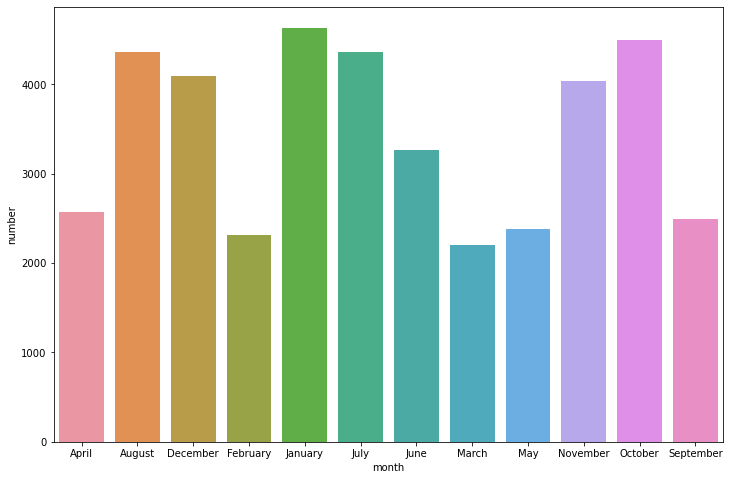

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_2015_month, x="month", y="number")
plt.show()

## 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [33]:
df_fire = df.groupby("state")["number"].mean().sort_values(ascending=False)
df_fire = df_fire.reset_index()
df_fire

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


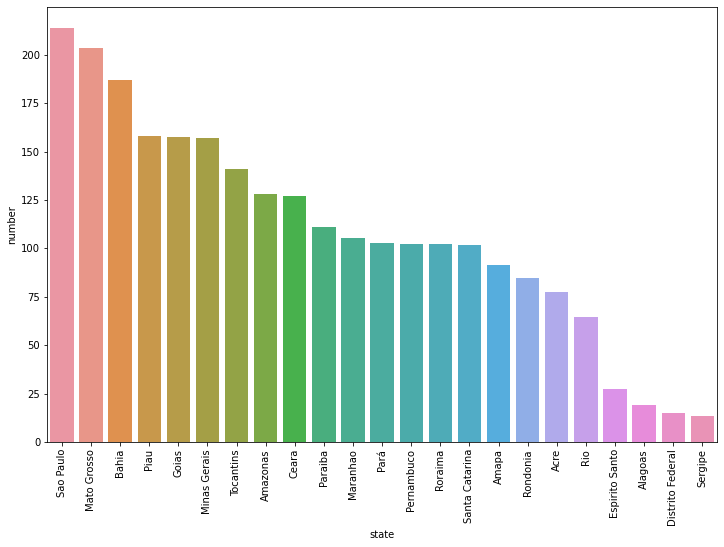

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_fire, x="state", y="number")
plt.xticks(rotation=90)
plt.show()

## 18.  To Find The State Names Where Fires Were Reported In 'December' Month

In [35]:
df[df["month"]=="December"]["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)